In [103]:
import pandas as pd 
import numpy as np 

In [104]:
df = pd.read_csv('daily-total-female-births-CA.csv')
df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [105]:
df['date'].dtype

dtype('O')

In [106]:
df.dtypes

date      object
births     int64
dtype: object

# but we can't keep date in object format so:

In [107]:
df_main = pd.read_csv('daily-total-female-births-CA.csv',header=0,parse_dates=[0])

In [108]:
df_main.dtypes

date      datetime64[ns]
births             int64
dtype: object

# Now loading data as series

In [109]:
series = pd.read_csv('daily-total-female-births-CA.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)

C:\Users\shahd\AppData\Local\Temp\ipykernel_24448\263991075.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-total-female-births-CA.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)


In [110]:
series.head(10)

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: births, dtype: int64

In [111]:
series.dtypes

dtype('int64')

In [112]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

# Zoom

In [113]:
from matplotlib import pyplot as plt 
%matplotlib inline

In [114]:
copied=df_main.copy()
copied.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [115]:
copied.index = copied['date']

<Axes: xlabel='date'>

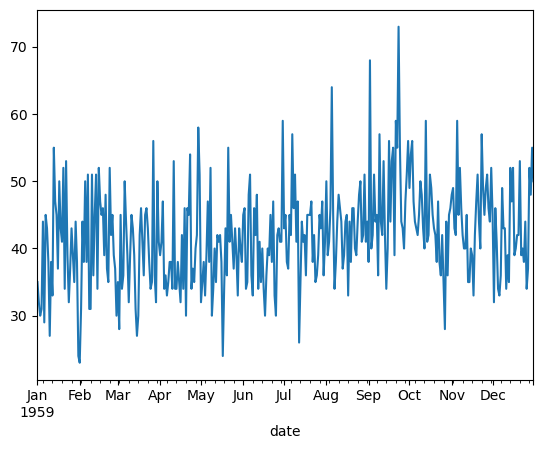

In [116]:
copied['births'].plot()

In [117]:
copied_zoom = copied[(copied['date']>'1959-01-01') & (copied['date'] <= '1959-01-10')].copy()

<Axes: xlabel='date'>

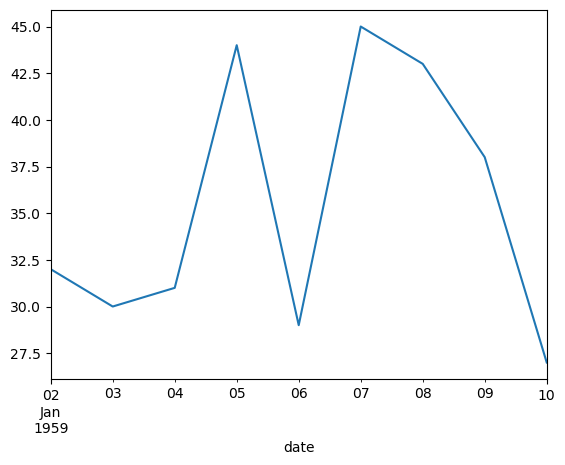

In [118]:
copied_zoom['births'].plot()

# Trendline

In [119]:
import seaborn as sns

<Axes: ylabel='births'>

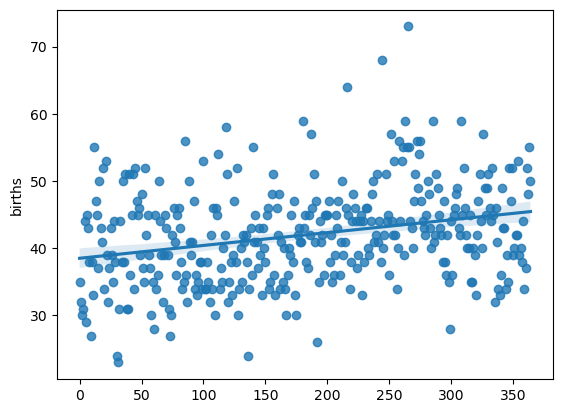

In [120]:
sns.regplot(x=df_main.index.values, y=df_main['births'])

# Removing seasonality

In [121]:
df_main['year']=df_main['date'].dt.year

In [122]:
df_main.head()

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959
2,1959-01-03,30,1959
3,1959-01-04,31,1959
4,1959-01-05,44,1959


In [123]:
df_main.groupby('year')['births'].mean()

year
1959    41.980822
Name: births, dtype: float64

<Axes: xlabel='year'>

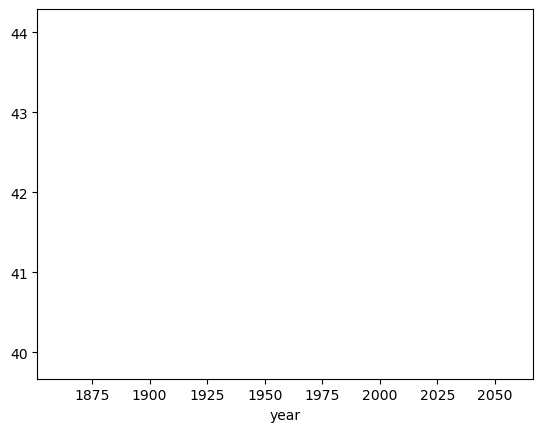

In [124]:
df_main.groupby('year')['births'].mean().plot()

# Creating Lag plots

In [125]:
df_main['lag1'] = df_main['births'].shift(1)

In [126]:
df_main.head()

,date,births,year,lag1
0,1959-01-01,35,1959,NaN
1,1959-01-02,32,1959,35.0
2,1959-01-03,30,1959,32.0
3,1959-01-04,31,1959,30.0
4,1959-01-05,44,1959,31.0


<Axes: xlabel='lag1', ylabel='births'>

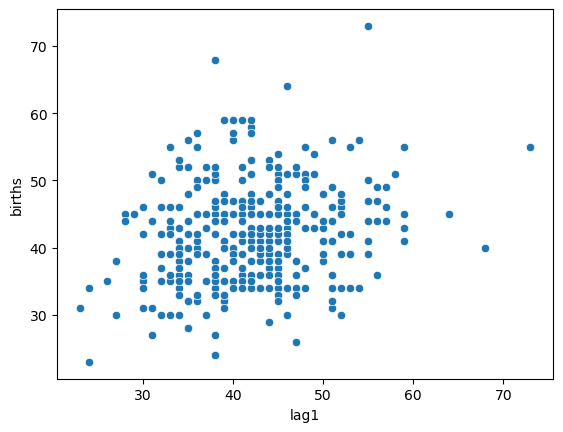

In [127]:
sns.scatterplot(x=df_main['lag1'], y=df_main['births'])

In [128]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

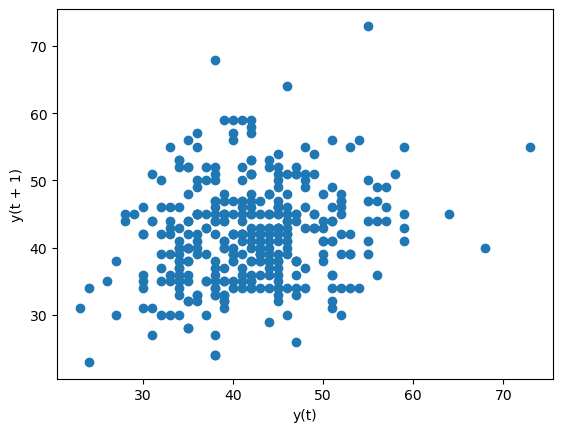

In [129]:
lag_plot(df_main['births'])

# Auto-correlation

In [130]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

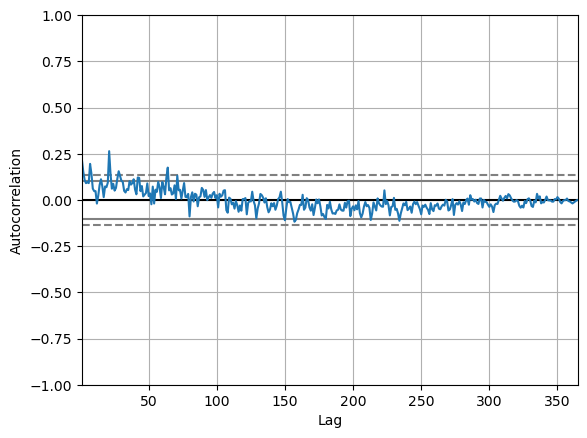

In [131]:
autocorrelation_plot(df_main['births'])

# types of features

In [132]:
df_main.head(10)

,date,births,year,lag1
0,1959-01-01,35,1959,NaN
1,1959-01-02,32,1959,35.0
2,1959-01-03,30,1959,32.0
3,1959-01-04,31,1959,30.0
4,1959-01-05,44,1959,31.0
5,1959-01-06,29,1959,44.0
6,1959-01-07,45,1959,29.0
7,1959-01-08,43,1959,45.0
8,1959-01-09,38,1959,43.0
9,1959-01-10,27,1959,38.0


In [133]:
df_main['lag2'] = df_main['births'].shift(365)
df_main['month'] = df_main['date'].dt.month
df_main['day'] = df_main['date'].dt.day

In [134]:
df_main.head(10)

,date,births,year,lag1,lag2,month,day
0,1959-01-01,35,1959,NaN,NaN,1,1
1,1959-01-02,32,1959,35.0,NaN,1,2
2,1959-01-03,30,1959,32.0,NaN,1,3
3,1959-01-04,31,1959,30.0,NaN,1,4
4,1959-01-05,44,1959,31.0,NaN,1,5
5,1959-01-06,29,1959,44.0,NaN,1,6
6,1959-01-07,45,1959,29.0,NaN,1,7
7,1959-01-08,43,1959,45.0,NaN,1,8
8,1959-01-09,38,1959,43.0,NaN,1,9
9,1959-01-10,27,1959,38.0,NaN,1,10


# Window features

In [135]:
df_main['Roll_mean']= df_main['births'].rolling(window=2).mean()

In [136]:
df_main.head(10)

,date,births,year,lag1,lag2,month,day,Roll_mean
0,1959-01-01,35,1959,NaN,NaN,1,1,NaN
1,1959-01-02,32,1959,35.0,NaN,1,2,33.5
2,1959-01-03,30,1959,32.0,NaN,1,3,31.0
3,1959-01-04,31,1959,30.0,NaN,1,4,30.5
4,1959-01-05,44,1959,31.0,NaN,1,5,37.5
5,1959-01-06,29,1959,44.0,NaN,1,6,36.5
6,1959-01-07,45,1959,29.0,NaN,1,7,37.0
7,1959-01-08,43,1959,45.0,NaN,1,8,44.0
8,1959-01-09,38,1959,43.0,NaN,1,9,40.5
9,1959-01-10,27,1959,38.0,NaN,1,10,32.5


In [137]:
df_main['Roll_max']= df_main['births'].rolling(window=3).max()

In [138]:
df_main.head(10)

,date,births,year,lag1,lag2,month,day,Roll_mean,Roll_max
0,1959-01-01,35,1959,NaN,NaN,1,1,NaN,NaN
1,1959-01-02,32,1959,35.0,NaN,1,2,33.5,NaN
2,1959-01-03,30,1959,32.0,NaN,1,3,31.0,35.0
3,1959-01-04,31,1959,30.0,NaN,1,4,30.5,32.0
4,1959-01-05,44,1959,31.0,NaN,1,5,37.5,44.0
5,1959-01-06,29,1959,44.0,NaN,1,6,36.5,44.0
6,1959-01-07,45,1959,29.0,NaN,1,7,37.0,45.0
7,1959-01-08,43,1959,45.0,NaN,1,8,44.0,45.0
8,1959-01-09,38,1959,43.0,NaN,1,9,40.5,45.0
9,1959-01-10,27,1959,38.0,NaN,1,10,32.5,43.0


# Expanding features

In [139]:
df_main['Expand_max']=df_main['births'].expanding().max()

In [140]:
df_main.head(10)

,date,births,year,lag1,lag2,month,day,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,NaN,NaN,1,1,NaN,NaN,35.0
1,1959-01-02,32,1959,35.0,NaN,1,2,33.5,NaN,35.0
2,1959-01-03,30,1959,32.0,NaN,1,3,31.0,35.0,35.0
3,1959-01-04,31,1959,30.0,NaN,1,4,30.5,32.0,35.0
4,1959-01-05,44,1959,31.0,NaN,1,5,37.5,44.0,44.0
5,1959-01-06,29,1959,44.0,NaN,1,6,36.5,44.0,44.0
6,1959-01-07,45,1959,29.0,NaN,1,7,37.0,45.0,45.0
7,1959-01-08,43,1959,45.0,NaN,1,8,44.0,45.0,45.0
8,1959-01-09,38,1959,43.0,NaN,1,9,40.5,45.0,45.0
9,1959-01-10,27,1959,38.0,NaN,1,10,32.5,43.0,45.0


# now for modelliing

In [141]:
df_main = df_main.set_index('date')

In [142]:
df_main.head(10)

,births,year,lag1,lag2,month,day,Roll_mean,Roll_max,Expand_max
date,,,,,,,,,
1959-01-01,35,1959,NaN,NaN,1,1,NaN,NaN,35.0
1959-01-02,32,1959,35.0,NaN,1,2,33.5,NaN,35.0
1959-01-03,30,1959,32.0,NaN,1,3,31.0,35.0,35.0
1959-01-04,31,1959,30.0,NaN,1,4,30.5,32.0,35.0
1959-01-05,44,1959,31.0,NaN,1,5,37.5,44.0,44.0
1959-01-06,29,1959,44.0,NaN,1,6,36.5,44.0,44.0
1959-01-07,45,1959,29.0,NaN,1,7,37.0,45.0,45.0
1959-01-08,43,1959,45.0,NaN,1,8,44.0,45.0,45.0
1959-01-09,38,1959,43.0,NaN,1,9,40.5,45.0,45.0


# Decomposing Time series:
## Models:
1. Additive: y(t) = Level + Trend + Seasonality + Noise
2. Multiplicative: y(t) = Level * Trend * Seasonality * Noise

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [144]:
result  = seasonal_decompose(df_main['births'],model='additive')

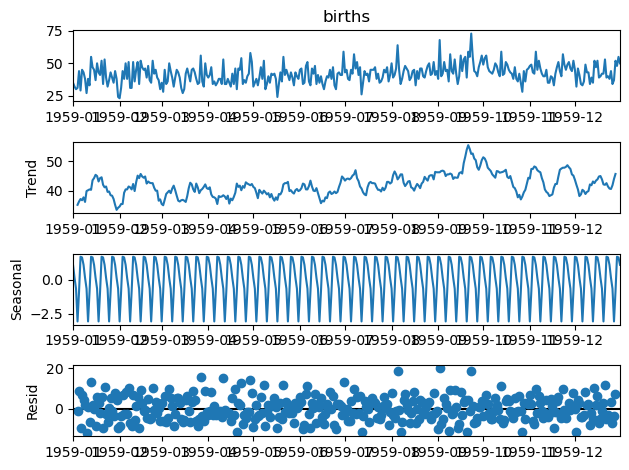

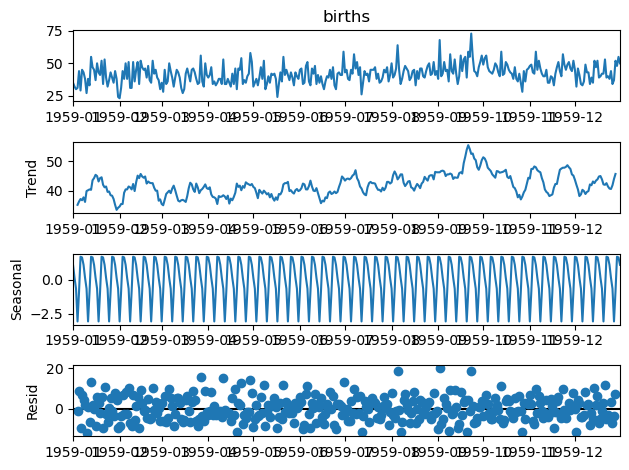

In [146]:
result.plot()

In [147]:
result1  = seasonal_decompose(df_main['births'],model='multiplicative')

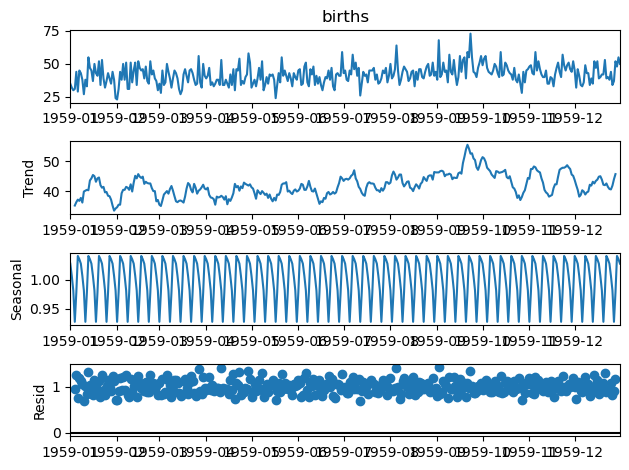

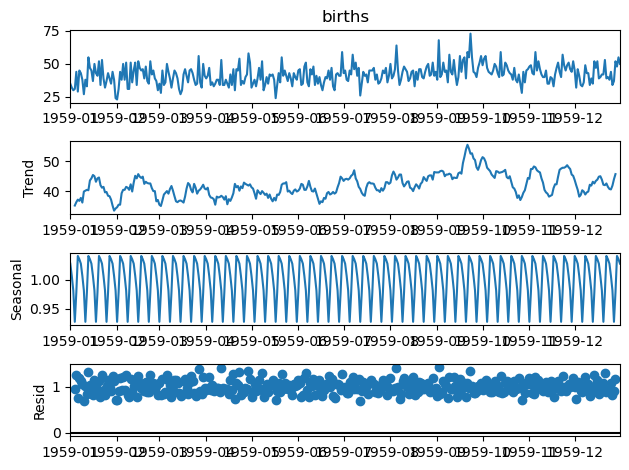

In [148]:
result1.plot()

# Differencing

In [149]:
df_main['diff'] = df_main['births'].diff(periods=1)

In [150]:
df_main.head(10)

,births,year,lag1,lag2,month,day,Roll_mean,Roll_max,Expand_max,diff
date,,,,,,,,,,
1959-01-01,35,1959,NaN,NaN,1,1,NaN,NaN,35.0,NaN
1959-01-02,32,1959,35.0,NaN,1,2,33.5,NaN,35.0,-3.0
1959-01-03,30,1959,32.0,NaN,1,3,31.0,35.0,35.0,-2.0
1959-01-04,31,1959,30.0,NaN,1,4,30.5,32.0,35.0,1.0
1959-01-05,44,1959,31.0,NaN,1,5,37.5,44.0,44.0,13.0
1959-01-06,29,1959,44.0,NaN,1,6,36.5,44.0,44.0,-15.0
1959-01-07,45,1959,29.0,NaN,1,7,37.0,45.0,45.0,16.0
1959-01-08,43,1959,45.0,NaN,1,8,44.0,45.0,45.0,-2.0
1959-01-09,38,1959,43.0,NaN,1,9,40.5,45.0,45.0,-5.0


<Axes: xlabel='date'>

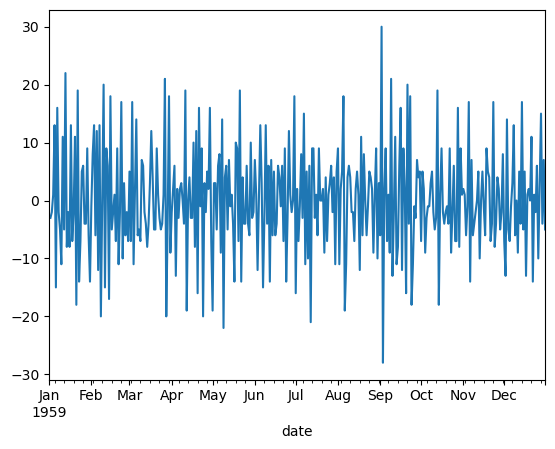

In [151]:
df_main['diff'].plot()

In [152]:
df_main['diff_12'] = df_main['diff'].diff(periods=12)

In [153]:
df_main.head(10)

,births,year,lag1,lag2,month,day,Roll_mean,Roll_max,Expand_max,diff,diff_12
date,,,,,,,,,,,
1959-01-01,35,1959,NaN,NaN,1,1,NaN,NaN,35.0,NaN,NaN
1959-01-02,32,1959,35.0,NaN,1,2,33.5,NaN,35.0,-3.0,NaN
1959-01-03,30,1959,32.0,NaN,1,3,31.0,35.0,35.0,-2.0,NaN
1959-01-04,31,1959,30.0,NaN,1,4,30.5,32.0,35.0,1.0,NaN
1959-01-05,44,1959,31.0,NaN,1,5,37.5,44.0,44.0,13.0,NaN
1959-01-06,29,1959,44.0,NaN,1,6,36.5,44.0,44.0,-15.0,NaN
1959-01-07,45,1959,29.0,NaN,1,7,37.0,45.0,45.0,16.0,NaN
1959-01-08,43,1959,45.0,NaN,1,8,44.0,45.0,45.0,-2.0,NaN
1959-01-09,38,1959,43.0,NaN,1,9,40.5,45.0,45.0,-5.0,NaN


In [156]:
plot = seasonal_decompose(df_main.iloc[17:,4],model='additive')

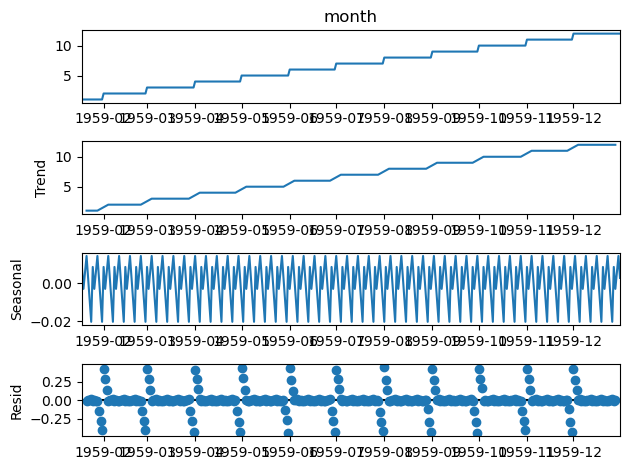

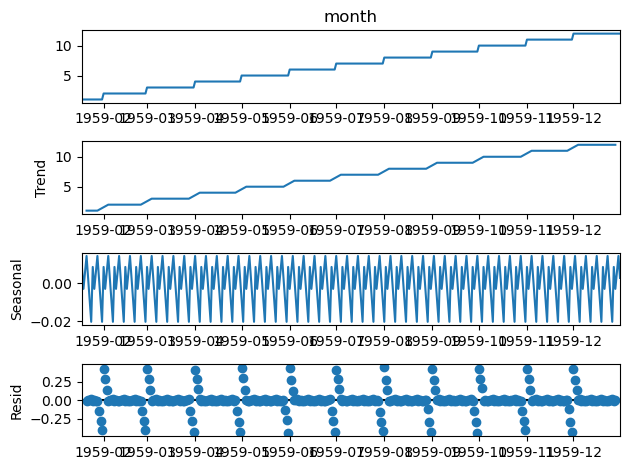

In [157]:
plot.plot()